<a href="https://colab.research.google.com/github/artantica/Bezpieczenstwo/blob/master/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## For Colab

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
!pip install scikit-learn==0.24.1

In [ ]:
import sklearn
print (sklearn.__version__)

# Zadania Lista 3

1\. (1.5 pkt) Przy pomocy sklearn, wczytaj zbiór danych [California Housing](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

Za pomocą Pandas Profiling przeanalizuj ten zbiór i odpowiedz na następujące pytania:

- Ile znajduje się w zbiorze cech kategorycznych, a ile numerycznych? 
- Czy zmienna wyjściowa jest kategoryczna, czy numeryczna?
- Czy rozpatrujemy problem klasyfikacji, klasteryzacji czy regresji?
- Ile w zbiorze jest brakujących wartości?
- Czy któraś z cech koreluje ze zmienną wyjściową? Jeśli tak - która?


In [2]:
import pandas as pd

from pandas_profiling import ProfileReport
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset = fetch_california_housing()
print(dataset.DESCR)
dataset

In [4]:
sklearn_housing = pd.DataFrame(dataset.data, columns=dataset.feature_names)
sklearn_housing["MedianHouseValue"] = dataset.target
sklearn_housing

MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  MedianHouseValue
0      8.3252      41.0  6.984127  ...     37.88    -122.23             4.526
1      8.3014      21.0  6.238137  ...     37.86    -122.22             3.585
2      7.2574      52.0  8.288136  ...     37.85    -122.24             3.521
3      5.6431      52.0  5.817352  ...     37.85    -122.25             3.413
4      3.8462      52.0  6.281853  ...     37.85    -122.25             3.422
...       ...       ...       ...  ...       ...        ...               ...
20635  1.5603      25.0  5.045455  ...     39.48    -121.09             0.781
20636  2.5568      18.0  6.114035  ...     39.49    -121.21             0.771
20637  1.7000      17.0  5.205543  ...     39.43    -121.22             0.923
20638  1.8672      18.0  5.329513  ...     39.43    -121.32             0.847
20639  2.3886      16.0  5.254717  ...     39.37    -121.24             0.894

[20640 rows x 9 columns]

In [5]:
profile = ProfileReport(sklearn_housing)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

1. *Ile znajduje się w zbiorze cech kategorycznych, a ile numerycznych?* - W zbiorze znajduje się 0 cech kategorycznych i 9 cech numerycznych.
2. *Czy zmienna wyjściowa jest kategoryczna, czy numeryczna?* - Zmienna wyjściowa jest numeryczna.
3. *Czy rozpatrujemy problem klasyfikacji, klasteryzacji czy regresji?* - Rozpatrujemy problem regresji.
4. *Ile w zbiorze jest brakujących wartości?* - W tym zbiorze nie ma brakujących wartości.
5. *Czy któraś z cech koreluje ze zmienną wyjściową? Jeśli tak - która?* - Tak, MedInc

2\. (3 pkt) Stwórz i wyucz pipeline składający się z modułów standaryzacji i estymatora - w zależności czy problem dotyczy klasyfikacji czy regresji, użyj [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) lub [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). 

In [26]:
# TUTAJ UMIEŚĆ KOD
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

pipeline_classifier = make_pipeline(
    StandardScaler(), 
    RandomForestRegressor()
)

pipeline_classifier.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [7]:
#@title
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predicted = pipeline_classifier.predict(X_test)

print('mean_absolute_error: ', mean_absolute_error(y_test, y_predicted))
print('mean_squared_error: ', mean_squared_error(y_test, y_predicted))
print('r2_score: ', r2_score(y_test, y_predicted))

mean_absolute_error:  0.33601833968023276
mean_squared_error:  0.2697508317635024
r2_score:  0.7998423198283432


3\. (3 pkt) Używając walidacji krzyżowej z 10 foldami (sprawdź odpowiedni parametr w [dokumentacji](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)) sprawdź jakość predykcji, używając odpowiednich do zadania metryk (wybierz odpowiednią - przykładowe [tutaj](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics))

In [8]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [9]:
# TUTAJ UMIEŚĆ KOD
from sklearn.model_selection import cross_validate

scores = cross_validate(pipeline_classifier, X_test, y_test, cv=10, n_jobs=-1, scoring=('r2', 'explained_variance', 'neg_mean_squared_error'))
print(scores["test_r2"].mean())
print(scores["test_neg_mean_squared_error"].mean())
print(scores["test_explained_variance"].mean())

0.7450760426784246
-0.3424043802721533
0.745758799845788


4\. (2 pkt) Używając cross-walidacji, porównaj jakość modelu używającego i nieużywającego standaryzacji cech.

In [10]:
# TUTAJ UMIEŚĆ KOD
pipeline_classifier_no_standarization = make_pipeline(
    RandomForestRegressor(n_estimators=35,random_state=15)
)

pipeline_classifier_no_standarization.fit(X_train, y_train)

Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(n_estimators=35, random_state=15))])

In [11]:
scores_no_standarization = cross_validate(pipeline_classifier_no_standarization, X_test, y_test, cv=10, n_jobs=-1, scoring=('r2', 'explained_variance', 'neg_mean_squared_error'))
print(scores_no_standarization["test_r2"].mean())
print(scores_no_standarization["test_neg_mean_squared_error"].mean())
print(scores_no_standarization["test_explained_variance"].mean())

0.7404051882239489
-0.3482934052545364
0.7411438239851715


Text(0.5, 1.0, 'negative mean squared error score')

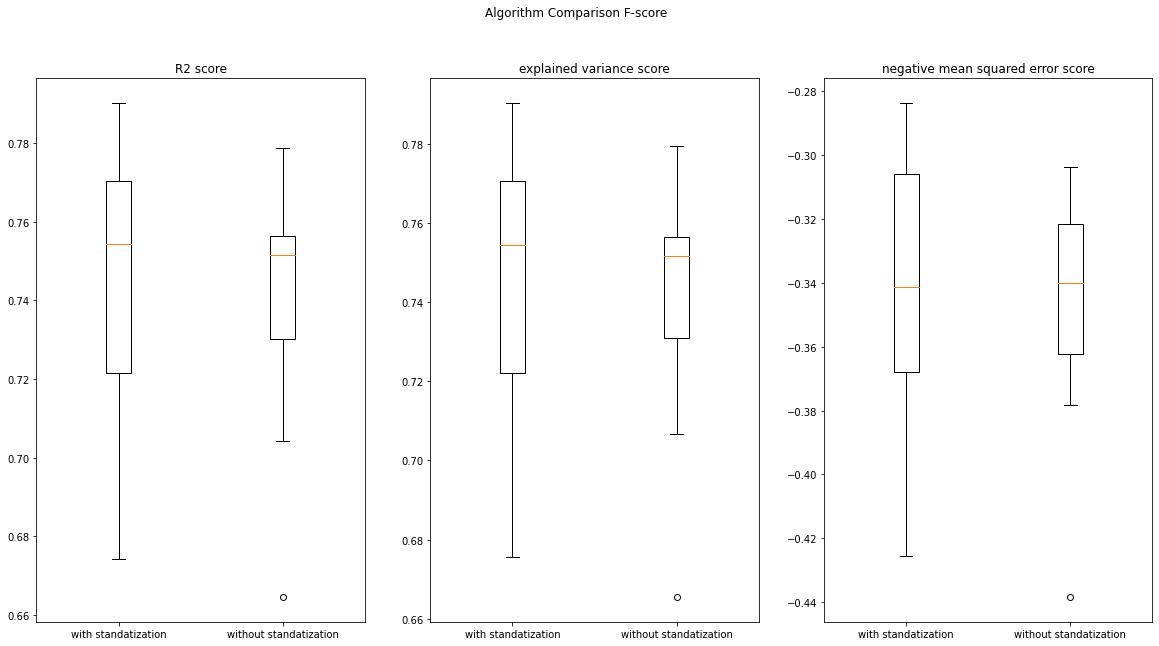

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

names = ["with standatization", "without standatization"]
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.suptitle('Algorithm Comparison F-score')

ax1.boxplot([scores["test_r2"], scores_no_standarization["test_r2"]])
ax1.set_xticklabels(names)
ax1.set_title('R2 score')

ax2.boxplot([scores["test_explained_variance"], scores_no_standarization["test_explained_variance"]])
ax2.set_xticklabels(names)
ax2.set_title('explained variance score')

ax3.boxplot([scores["test_neg_mean_squared_error"], scores_no_standarization["test_neg_mean_squared_error"]])
ax3.set_xticklabels(names)
ax3.set_title('negative mean squared error score')

5\. Porównaj następujące metody optymalizacji parametrów modelu, `RandomSearch`, `GridSearch`, `HalvingGridSearch`, `HalvingRandomSearch`

a) (1 pkt) Opisz pokrótce ich działanie, możliwości i ograniczenia

`RandomSearch`  W każdej swojej iteracji generuje jeden losowy zestaw hiperparametrów i porównuje je z najlepszym dotychczas znalezionym. Jeśli nowy zestaw jest lepszy niż dotychczas znane najlepszy, to nowy zestaw zasępuje najlepszy dotychczas znany. Nie są badane wszystkie możliwe opcje, ale konkretna liczba zestawów (`n_iter`). Zaletą tej metody jest możliwość ustawienia liczby iteracji.

 `GridSearch`: Ta metoda porównuje każdą kombinacje hiperparametrów, co wiąże się z wykładniczym wzrostem ewaluacji wraz ze zwrostem parametrów.

 `HalvingRandomSearch`: Generuje zestawy hiperparametrów wykorzystując strategię sukcesywnego połowienia. Rozpoczyna przeszukiwanie zestawów hiperparamerów z małą liczbą zasobów, a następnie poprzez iteracyjne wybieranie najlepszych kandydatów zwiększa zostaje ilość zasobów. Liczba kandydatów ustawiana jest poprzez `n_candidates`.

 `HalvingGridSearch`: Porównuje każdą kombinacje parametrów wykorzystując strategię sukcesywnego połowienia. Pozwala ona znaleźć podobne parametry do `GridSearch` w dużo krótszym czasie. Polega ono na początkowym zminiejszeniu zasobów (próbek treningowych lub liczy estymatorów), a następnie stopniowe ich zwiększanie wraz z zawężeniem liczby zestawów hiperparametrów.


b) (2 pkt) Użyj ich i porównaj jakość najlepszego modelu oraz czas ich działania. Narysuj odpowiedni wykres 

In [14]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
import time

In [ ]:
pipeline_classifier.get_params()

In [46]:
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_distributions = {#'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
              #  'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf,
               'randomforestregressor__bootstrap': bootstrap}

number = np.prod([len(param_distributions[param]) for param in param_distributions])
print(number)

optimizers = {"RandomSearch": {}, "GridSearch": {}, "HalvingGridSearch": {}, "HalvingRandomSearch": {}}

144


In [101]:
def evaluate_model(model, name, X, y):
    start_time = time.time()
    model.fit(X, y)
    end_time = time.time()

    # y_pred = model.predict(x_test)

    optimizers[name]["time"] = end_time - start_time
    optimizers[name]["best_score"] = -model.best_score_
    optimizers[name]["best_params"] = model.best_params_
    optimizers[name]["cv_results"] = model.cv_results_
    optimizers[name]["iterations"] = len(model.cv_results_["mean_fit_time"])

In [48]:
randomSearch = RandomizedSearchCV(estimator=pipeline_classifier,
                            param_distributions=param_distributions,
                            return_train_score=False, n_jobs=-1,
                            scoring='neg_mean_squared_error')

gridSearch = GridSearchCV(estimator=pipeline_classifier,
                            param_grid=param_distributions, n_jobs=-1,
                            scoring='neg_mean_squared_error')

halvingGridSearch = HalvingGridSearchCV(estimator=pipeline_classifier,
                            param_grid=param_distributions, 
                            random_state=42, n_jobs=-1,
                            scoring='neg_mean_squared_error')

halvingRandomSearch = HalvingRandomSearchCV(estimator=pipeline_classifier,
                            param_distributions=param_distributions,
                            random_state=42, n_jobs=-1,
                            scoring='neg_mean_squared_error')


In [85]:
evaluate_model(randomSearch, "RandomSearch", X, y)
evaluate_model(gridSearch, "GridSearch", X, y)
evaluate_model(halvingGridSearch, "HalvingGridSearch", X, y)
evaluate_model(halvingRandomSearch, "HalvingRandomSearch", X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 144 is smaller than n_iter=2064. Running 144 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [104]:
for name in optimizers:
  print(name)
  print(f"Best params: {optimizers[name]['best_params']}")
  print(f"Best score: {optimizers[name]['best_score']}")
  print(f"Time of executing: {optimizers[name]['time']}")
  print(f"Iterations: {optimizers[name]['iterations']}")
  print("--------------------\n")

RandomSearch
Best params: {'randomforestregressor__min_samples_leaf': 4, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__max_depth': 110, 'randomforestregressor__bootstrap': True}
Best score: 0.4224848153810214
Time of executing: 358.7941370010376
Iterations: 10
--------------------

GridSearch
Best params: {'randomforestregressor__bootstrap': True, 'randomforestregressor__max_depth': 90, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_samples_leaf': 2}
Best score: 0.42381904403955967
Time of executing: 4700.954212665558
Iterations: 144
--------------------

HalvingGridSearch
Best params: {'randomforestregressor__bootstrap': True, 'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_samples_leaf': 4}
Best score: 0.42134111379260164
Time of executing: 387.9067573547363
Iterations: 216
--------------------

HalvingRandomSearch
Best params: {'randomforestregressor__min_samples_l

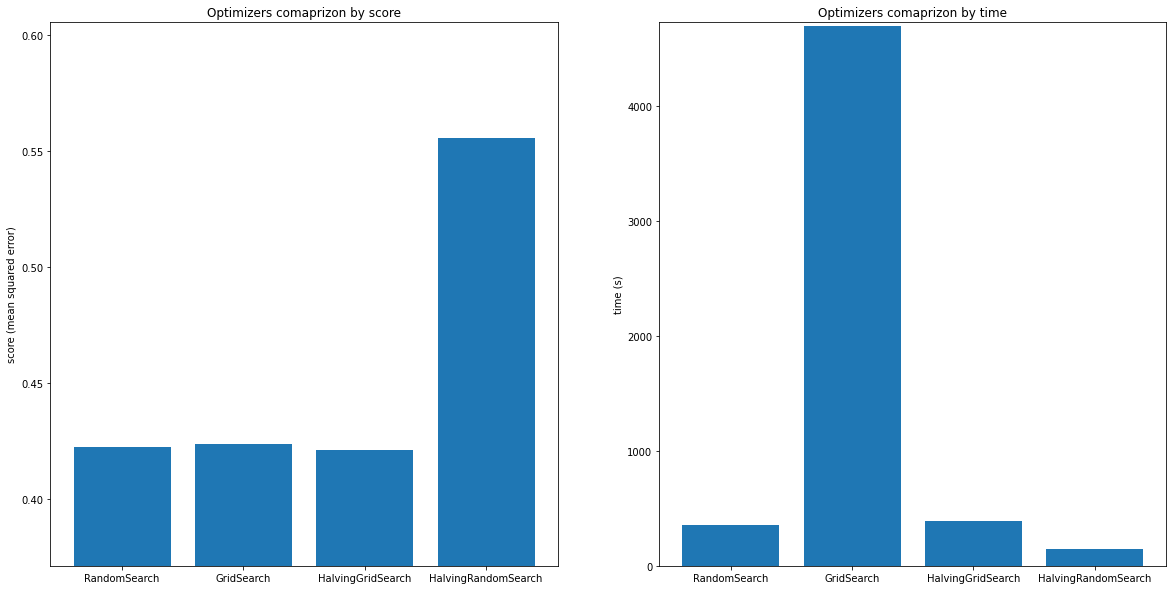

In [88]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

scores = [opt["best_score"] for opt in optimizers.values()]
ax1.bar(optimizers.keys(), scores)
ax1.set_ylabel("score (mean squared error)")
ax1.set_ylim(ymin=min(scores)-.05, ymax=max(scores)+.05)
ax1.set_title("Optimizers comaprizon by score")

times = [opt["time"] for opt in optimizers.values()]
ax2.bar(optimizers.keys(), times)
ax2.set_ylabel("time (s)")
ax2.set_ylim(ymax=max(times)+30)
ax2.set_title("Optimizers comaprizon by time")

plt.show()

c) (1.5 pkt) Podaj lub oszacuj ilość iteracji każdej z metod (tj. ilość stworzonych podczas działania modeli)

In [92]:
# TUTAJ UMIEŚĆ ODPOWIEDZI
print(f"""Random Search: {optimizers["RandomSearch"]["iterations"]}""")
print(f"""Grid Search: {optimizers["GridSearch"]["iterations"]}""")
print(f"""Galving Random Search: {optimizers["HalvingRandomSearch"]["iterations"]}""")
print(f"""Halving Grid Search: {optimizers["HalvingGridSearch"]["iterations"]}""")

Random Search: 10
Grid Search: 144
Galving Random Search: 216
Halving Grid Search: 216


d) (1 pkt) Podsumuj uzyskane wyniki. Wskaż twoim zdaniem najlepszą wykorzystaną metodę optymalizacji hiperparametrów. Wybór uzasadnij.


Najskuteczniejszą metodą w tym przypadku jest `HalvingGridSearch`. Wyniki najlepszego wyboru parametrów są porównywalne do uzyskanych za pomocą `RandomSearch` o `GridSearch`, a czas potrzebny do znalezienia takich wyników jest najmniejszy. Co więcej, ta metoda przeszukuje wszystkie możliwości parametrów, a nie tylko losowe kombinacje, co powoduje, że istnieje dużo prawdopodobieństwo uzyskania dobrywch wyników.